# Air Quality in India

Air pollution is one of the greatest environmental risks that has accelerated over the past few decades across the globe as nations have become more industrialized. The governmental agency WHO, attributes around 7 million deaths per year, globally, due to air pollution. India is amongst the most polluted countries in the entire world. With air quality not meeting the current standards listed by WHO (such as particulate matter PM₂.₅ not exceeding 5 μg/m³ averaged annually), factors such as respiratory diseases and life expectancy are gravely affected as a result. Suspended Particulate Matter (spm, μg/m³) refers to particles with a diameter less than 100 micrometers (Sebastian, 2011). These particles, especially respirable suspended particulate matter (rspm, μg/m³), pose threats to human health and are gateways to developing diseases such as lung cancer. Air pollutants such as Sulfur Dioxide (SO₂) and Nitrogen Dioxide (NO₂) have been primary contributors to India’s poor air quality over the past few decades, accelerated by the burning of fossil fuels. These two pollutants in particular are highlighted by the Environmental Protection Agency (EPA) as threats to both humans and environmental health, and thus, have projected limits and thresholds that shouldn’t be exceeded in the atmosphere ("Primary National...," 2022). For SO₂, as established by the National Ambient Air Quality Standard (NAAQS) in 2010, quantities should not exceed 75 parts per billion (ppb) yearly (or equivalently, 20 μg/m³). For NO₂, this value stands at about 100 (ppb) on average, yearly (40 μg/m³) ("Air Pollution," 2022).

   The level of particulate matter (spm, rspm) and pollutants (NO₂, SO₂) varies by location and state in India. We will examine levels of these pollutants collectively through a dataset (obtained through the Ministry of Environment and Forests and Central Pollution Board of India) which highlights recorded concentrations by day, state and locations across the country from 1987 - 2015. Location types such as residential areas, industrial areas and others will be assessed and compared in terms of pollutant levels. We’ll also generate insights on average yearly concentrations in India, both for SO₂ and NO₂ based on the given data. Quantities by state (with sample sizes exceeding 1,000) will be given, as well as background information on policies and why certain areas are more polluted than others. Finally, we will make necessary comparisons about the relationship between SO₂, NO₂, and spm, and how they may or may not lead to an increase in rspm levels through a regression analysis. 


In [33]:
# Importing necessarry packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Importing dataset, relative path
raw_data = pd.read_csv('data.csv', encoding = 'latin1')

In [3]:
raw_data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [4]:
# Column Information:
# stn_code: station code which recorded the data
# sampling_date: date when recorded
# state: represents state
# location: represents city
# agency: name of agency that measured the data
# type: type of area where measurement was made
# so2: amount of Sulfur Dioxide (ppm)
# no2: amount of Nitrogen Dioxide (ppm)
# rspm: respirable suspended particulate matter (ppm)
# spm: suspended particulate matter (ppm)
# location monitoring station: location of monitoring area
# pm2_5: represents value of particulate matter measured (ppm)
# date: secondary date of recording

In [5]:
# We will focus on the following categories for our analysis:
# 1 - State
# 2 - Type (Residential, Industrial, or Sensitive/Other)
# 3 - Date
# 4 - NO2
# 5 - SO2
# 6 - rspm
# 7 - spm
# Removing all unnecessary columns
raw_data.drop(['stn_code','sampling_date','agency','location_monitoring_station','location','pm2_5'],axis=1,inplace=True)
raw_data.head(5)

,state,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [6]:
# Checking null values
raw_data.isnull().sum()

state         0
type       5393
so2       34646
no2       16233
rspm      40222
spm      237387
date          7
dtype: int64

In [7]:
# General descriptives
raw_data.describe(include='all')

,state,type,so2,no2,rspm,spm,date
count,435742,430349,401096.000000,419509.000000,395520.000000,198355.000000,435735
unique,37,10,NaN,NaN,NaN,NaN,5067
top,Maharashtra,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN,2015-03-19
freq,60384,179014,NaN,NaN,NaN,NaN,253
mean,NaN,NaN,10.829414,25.809623,108.832784,220.783480,NaN
std,NaN,NaN,11.177187,18.503086,74.872430,151.395457,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,5.000000,14.000000,56.000000,111.000000,NaN
50%,NaN,NaN,8.000000,22.000000,90.000000,187.000000,NaN
75%,NaN,NaN,13.700000,32.200000,142.000000,296.000000,NaN


###### We can already see by the averages of SO₂ and NO₂ that collectively, from our dataset, India remains below the thresholds of 20 μg/m³ and 40 μg/m³, respectively. However, the mean takes all daily recorded values. We will break these averages down by year further down.

###### We can also see extremely high values for SO₂ and NO₂ at 909 μg/m³ and 876 μg/m³, respectively.

In [8]:
# data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   state   435742 non-null  object 
 1   type    430349 non-null  object 
 2   so2     401096 non-null  float64
 3   no2     419509 non-null  float64
 4   rspm    395520 non-null  float64
 5   spm     198355 non-null  float64
 6   date    435735 non-null  object 
dtypes: float64(4), object(3)
memory usage: 23.3+ MB


In [10]:
# split date column into 'year,' 'month,' 'day' so we can analyze more clearly by 'year'
raw_data = raw_data.dropna(subset=['date']) # dropping null values, only 7
date_split = raw_data['date'].str.split("-", n=2, expand=True)
raw_data['Year'] = date_split[0]
del raw_data['date']
raw_data.head(3)

,state,type,so2,no2,rspm,spm,Year
0,Andhra Pradesh,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990
1,Andhra Pradesh,Industrial Area,3.1,7.0,NaN,NaN,1990
2,Andhra Pradesh,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990


In [24]:
# simplifying 'type' column into 3 categories
raw_data['type'] = raw_data['type'].replace(['Residential, Rural and other Areas','Residential and others','RIRUO'],'Residential')
raw_data['type'] = raw_data['type'].replace(['Industrial Area','Industrial Areas'],'Industrial')
raw_data['type'] = raw_data['type'].replace(['Sensitive Area','Sensitive Areas','Sensitive'], 'Sensitive / Other Areas')
raw_data['type'].value_counts()

Residential                267266
Industrial                 148069
Sensitive / Other Areas     15010
Name: type, dtype: int64

## Assessing  SO₂ Levels by Type of Area

In [25]:
so2_df = raw_data[raw_data['so2'].notna()] # filtering out null values for 'so2'
so2_data = so2_df[so2_df['type'].notna()] # filtering out null values for 'type'
so2_data[['type','so2']].isnull().sum() # checking to see if there are no null values

type    0
so2     0
dtype: int64

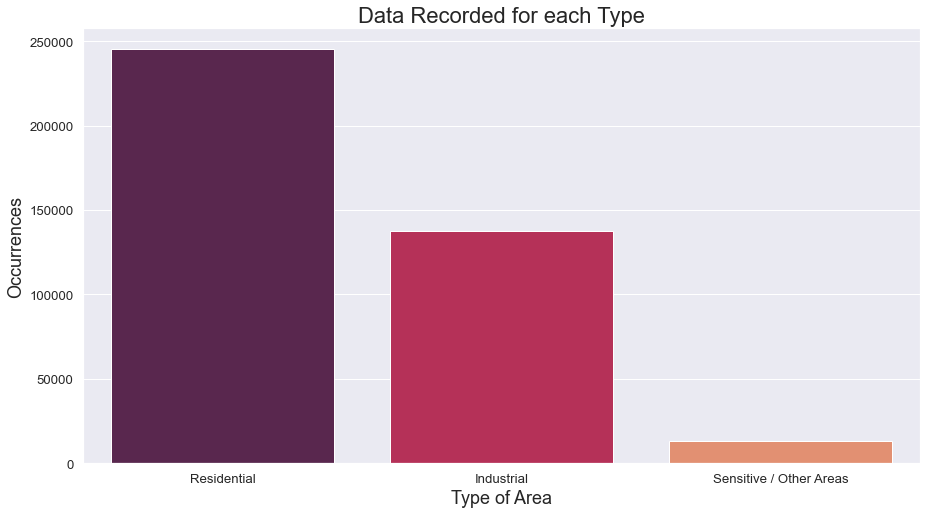

In [118]:
plt.figure(figsize=(15,8))
sns.countplot(so2_data['type'],palette='rocket')
plt.title('Data Recorded for each Type', fontsize=22)
plt.xlabel('Type of Area', fontsize=18)
plt.ylabel('Occurrences', fontsize=18)
sns.set(font_scale=2.2)
plt.show()

In [108]:
# The majority of our data set comes from 'Residential' areas
((so2_data['type'].value_counts()/sum(so2_data['type'].value_counts())).round(2)) 

Residential                0.62
Industrial                 0.35
Sensitive / Other Areas    0.03
Name: type, dtype: float64

In [109]:
# Average so2 concentrations overall, per type
so2_data.groupby(['type'])['so2'].mean().sort_values(ascending=False)

type
Industrial                 13.411389
Residential                 9.527012
Sensitive / Other Areas     6.118612
Name: so2, dtype: float64

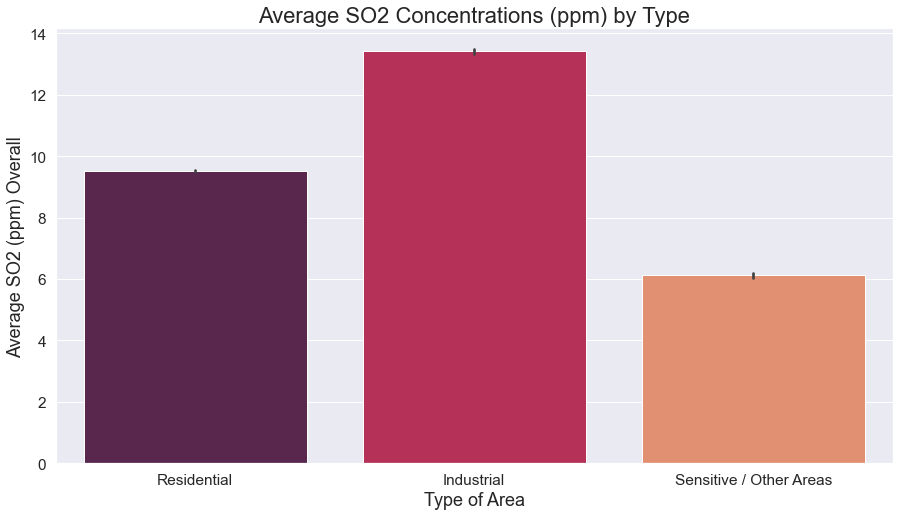

In [129]:
# Visualizing this
plt.figure(figsize=(15,8))
sns.barplot(x=so2_data['type'],y=so2_data['so2'],palette='rocket')
plt.title('Average SO2 Concentrations (ppm) by Type', fontsize=22)
plt.xlabel('Type of Area', fontsize=18)
plt.ylabel('Average SO2 (ppm) Overall', fontsize=18)
sns.set(font_scale=1.3)
plt.show()

###### Industrial regions in India have higher averaged concentrations of SO₂ (13.41 μg/m³) , as expected.

In [130]:
# Average SO2 concentrations per year for each location type
so2_by_year = pd.DataFrame(so2_data.groupby(['type','Year'])['so2'].mean()).reset_index()
so2_by_year.drop(so2_by_year[so2_by_year['Year'] == '2003'].index,inplace=True) # 2003 data not available
so2_indus = so2_by_year[so2_by_year['type'] == 'Industrial'][['Year','so2']].reset_index() # industrial avg
so2_resi = so2_by_year[so2_by_year['type'] == 'Residential'][['Year','so2']].reset_index() # residential avg
so2_sens = so2_by_year[so2_by_year['type'] == 'Sensitive / Other Areas'][['Year','so2']].reset_index() # sensitive/other avg
so2_final = pd.concat([so2_indus,so2_resi,so2_sens],axis=1)
del so2_final['index']
so2_final.set_index(so2_indus['Year'],inplace=True)
del so2_final['Year']
so2_final.set_axis(['Industrial SO2','Residential SO2','Sensitive / Other Areas SO2'],axis=1,inplace=True)
so2_final

,Industrial SO2,Residential SO2,Sensitive / Other Areas SO2
Year,,,
1987,27.130601,15.227778,14.250000
1988,28.265950,15.172477,17.080000
1989,22.715572,14.962349,9.687500
1990,21.303107,14.287336,12.745714
1991,20.541304,15.804116,12.885294
1992,17.906569,16.080992,14.200000
1993,28.116761,19.058113,18.604545
1994,28.091833,21.345306,13.995833
1995,32.147167,24.569298,9.339286


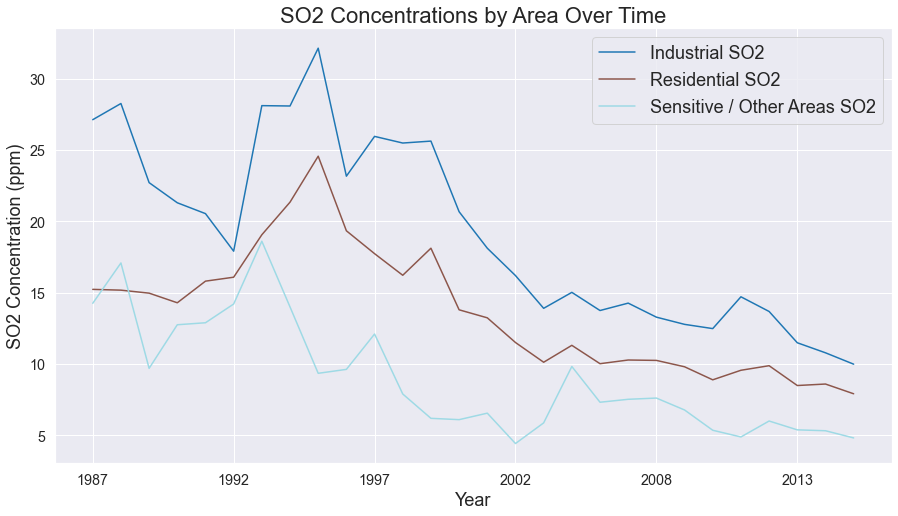

In [210]:
# Visualizing Data
so2_final.plot(figsize=(15,8), cmap='tab20')
plt.legend(prop={'size':18})
plt.title('SO2 Concentrations by Area Over Time',fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('SO2 Concentration (ppm)', fontsize=18)
plt.show()

###### Since 1987, SO₂ concentrations have fluxuated. Overall, for each location type, we can see a fair decrease in levels up until 2015. As mentioned previously, the EPA highlights 20 μg/m³ as the moderate threshold for air pollution yearly. We can see from this dataset that since the early 2000s, India has made great strides in maintaining levels below that value. 

###### Another point to make is that concentrations seen in industrial regions are consistently higher than residential and other sensitive regions, despite the decrease in levels for each type. This makes sense considering such regions are abundant in technologies that accelerate greenhouse gas emmissions through power plants and other fossil fuel burning equipment.

In [147]:
# Note: there appears to be more recorded data after 2004
so2_data['Year'].value_counts()

2015    48722
2013    43894
2014    43583
2011    36609
2010    34343
2012    34235
2007    28167
2008    27054
2006    24412
2009    24171
2005    16009
2004    14391
2003     2145
2002     1610
2001     1530
1996     1432
1990     1430
2000     1418
1991     1380
1997     1308
1998     1307
1999     1277
1995     1198
1993     1083
1994     1065
1992      790
1989      767
1988      522
1987      305
Name: Year, dtype: int64

### Assessing SO₂ Levels by State

In [154]:
# Only assessing the states with more than 1,000 sample so2 concentrations recorded
so2_state = so2_data['state'].value_counts()[0:28].reset_index()
a = []
for i in so2_state['index']:
    a.append(so2_data[so2_data['state'] == i]['so2'].mean())

so2_state['Avg SO2'] = a
del so2_state['state']

so2_state.set_axis(['State','Avg SO2'],axis=1,inplace=True)
so2_state.sort_values('Avg SO2',ascending=False,inplace=True)

so2_state.reset_index(inplace=True)
del so2_state['index']

so2_state

,State,Avg SO2
0,Uttarakhand,24.372957
1,Jharkhand,23.485794
2,Bihar,19.952264
3,Maharashtra,17.307478
4,Gujarat,16.660124
5,Haryana,14.064957
6,Chhattisgarh,12.846609
7,West Bengal,12.608766
8,Uttar Pradesh,12.398601
9,Puducherry,11.970639


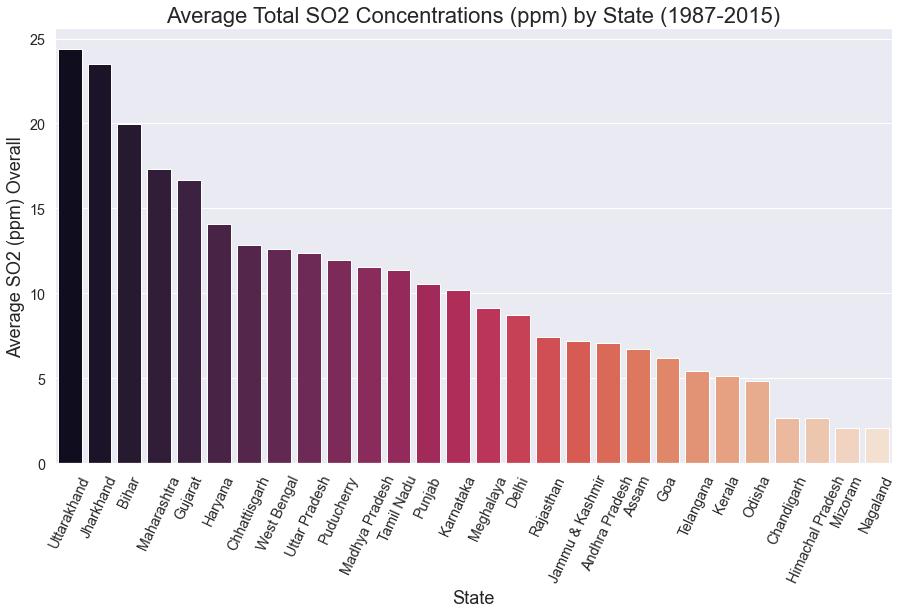

In [159]:
# Visualizing
plt.figure(figsize=(15,8))
sns.barplot(x=so2_state['State'],y=so2_state['Avg SO2'],palette='rocket')
plt.title('Average Total SO2 Concentrations (ppm) by State (1987-2015)', fontsize=22)
plt.xlabel('State', fontsize=18)
plt.ylabel('Average SO2 (ppm) Overall', fontsize=18)
plt.xticks(rotation=65)
sns.set(font_scale=1.3)
plt.show()

###### From the graph above, we can see that based on all recorded data, over the years 1987 - 2015, the state of Uttarakhand leads with an average SO₂ concentration of 24.37 μg/m³. Closely behind are Jhakhand, Bihar, Maharashtra, and Gujarat with SO₂ concentrations 23.49 μg/m³, 19.95 μg/m³, 17.30 μg/m³, and 16.66 μg/m³, respectively.

###### A rather recent report from 2021 suggests that based on data given in the Air Quality Life Index, the state of Uttarakhand was placed in the top 3 of locations with highest particulate matter concentrations (48 μg/m³). Extreme levels of SO₂ over the years could be a primary contributor to that title (Anab, 2021). 

In [179]:
# Avg so2 per year in India as a whole from gathered data
so2_yearly = pd.DataFrame(raw_data.groupby('Year')['so2'].mean()).reset_index()
so2_yearly.drop(16,inplace=True)
so2_yearly

,Year,so2
0,1987,21.827070
1,1988,22.098102
2,1989,18.668066
3,1990,17.723147
4,1991,17.607667
5,1992,17.719765
6,1993,21.958892
7,1994,22.478851
8,1995,26.000877
9,1996,20.645564


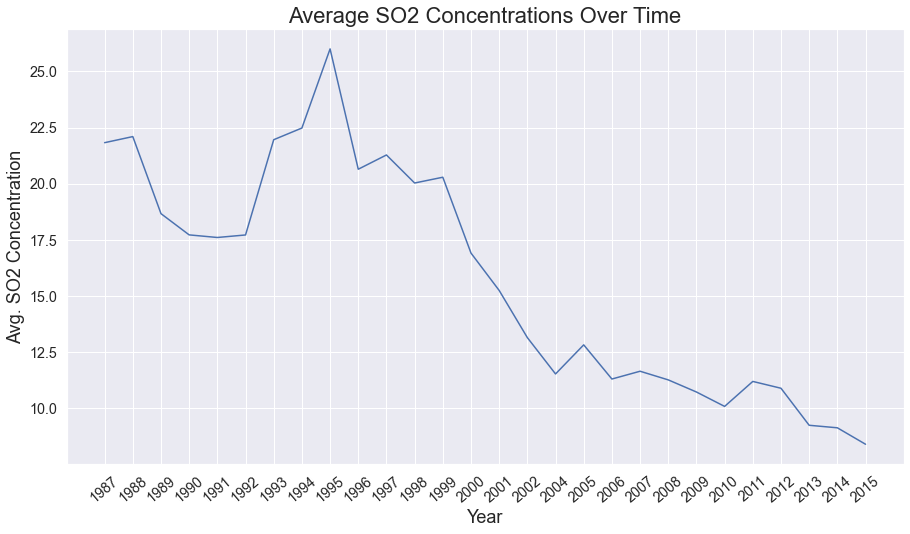

In [180]:
# Visualizing
plt.figure(figsize=(15,8))
sns.lineplot(x=so2_yearly['Year'],y=so2_yearly['so2'])
plt.title('Average SO2 Concentrations Over Time',fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Avg. SO2 Concentration',fontsize=18)
plt.xticks(rotation=40)
plt.show()

###### It appears India had made great strides in reducing concentrations of SO₂ since 1987. It should be noted that 2003 was not included, as there wasn't enough data in the original dataset to include it. 

###### Since the late 1900s and early 2000s, there have been significant reductions. Then thereafter until the endmost point of 2015, it hovered between 10 and 15 μg/m³.

## Assessing NO₂ Concentrations by Type of Area

In [164]:
no2_df = raw_data[raw_data['no2'].notna()] # filtering out null values for 'so2'
no2_data = no2_df[no2_df['type'].notna()] # filtering out null values for 'type'
no2_data[['type','no2']].isnull().sum() # checking to see if there are no null values

type    0
no2     0
dtype: int64

In [167]:
# Average no2 concentrations overall, per type
no2_data.groupby(['type'])['no2'].mean().sort_values(ascending=False)

type
Industrial                 29.462933
Residential                24.078990
Sensitive / Other Areas    19.960232
Name: no2, dtype: float64

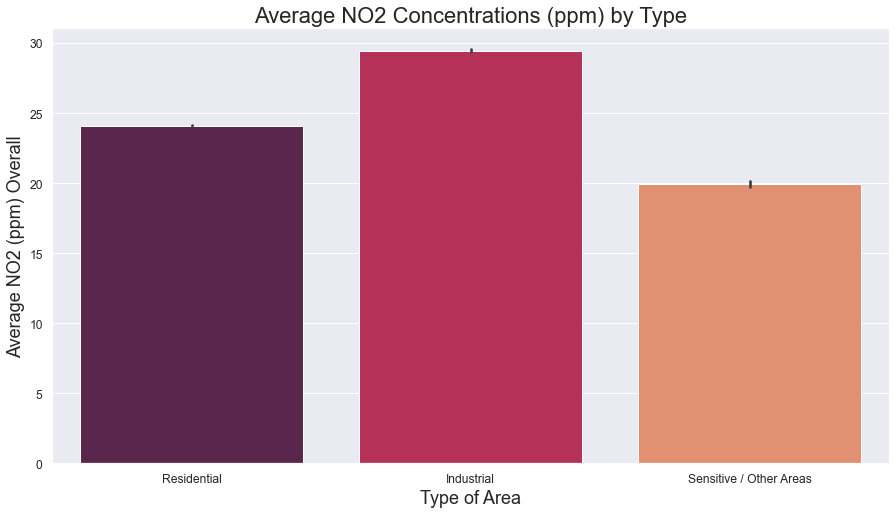

In [212]:
# Visualizing this
plt.figure(figsize=(15,8))
sns.barplot(x=no2_data['type'],y=no2_data['no2'],palette='rocket')
plt.title('Average NO2 Concentrations (ppm) by Type', fontsize=22)
plt.xlabel('Type of Area', fontsize=18)
plt.ylabel('Average NO2 (ppm) Overall', fontsize=18)
sns.set(font_scale=1.1)
plt.show()

###### Similar to SO₂ concentrations, industrial regions take the lead once again, with an average NO₂ level of 29.46 μg/m³.

In [170]:
# Average NO2 concentrations per year for each location type
no2_by_year = pd.DataFrame(no2_data.groupby(['type','Year'])['no2'].mean()).reset_index()
no2_by_year.drop(no2_by_year[no2_by_year['Year'] == '2003'].index,inplace=True) # 2003 data not available
no2_indus = no2_by_year[no2_by_year['type'] == 'Industrial'][['Year','no2']].reset_index() # industrial avg
no2_resi = no2_by_year[no2_by_year['type'] == 'Residential'][['Year','no2']].reset_index() # residential avg
no2_sens = no2_by_year[no2_by_year['type'] == 'Sensitive / Other Areas'][['Year','no2']].reset_index() # sensitive/other avg
no2_final = pd.concat([no2_indus,no2_resi,no2_sens],axis=1)
del no2_final['index']
no2_final.set_index(no2_indus['Year'],inplace=True)
del no2_final['Year']
no2_final.set_axis(['Industrial NO2','Residential NO2','Sensitive / Other Areas NO2'],axis=1,inplace=True)
no2_final

,Industrial NO2,Residential NO2,Sensitive / Other Areas NO2
Year,,,
1987,37.864767,19.492857,37.300000
1988,35.414286,24.316514,33.872000
1989,34.318483,23.159649,30.286667
1990,28.128039,22.837966,33.154286
1991,29.152415,23.498806,33.083333
1992,30.440091,26.748579,38.659091
1993,37.087947,22.844963,35.904545
1994,41.335921,23.570020,36.908333
1995,41.972134,25.792346,25.475000


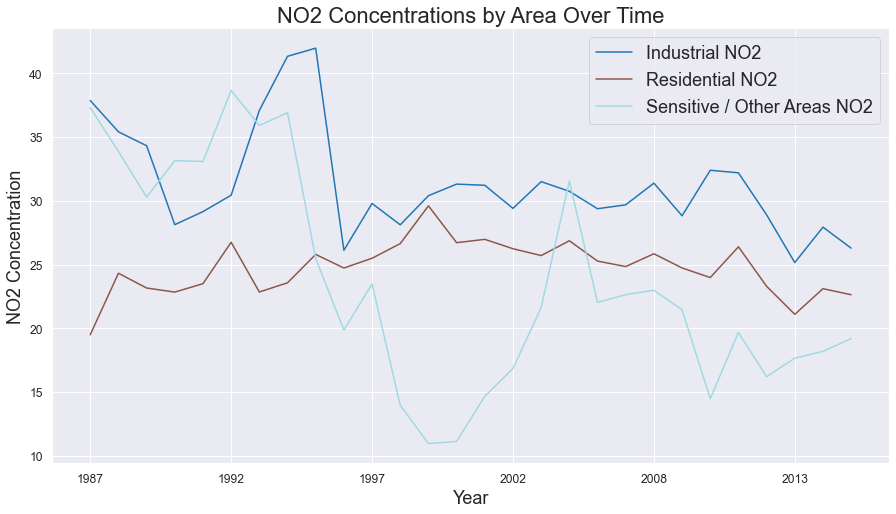

In [213]:
# Visualizing Data
no2_final.plot(figsize=(15,8), cmap='tab20')
plt.legend(prop={'size':18})
plt.title('NO2 Concentrations by Area Over Time',fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('NO2 Concentration', fontsize=18)
plt.show()

###### Industrial region NO₂ levels, on average, remain consistently above residential and other sensitive areas.

###### Unlike the plot for SO₂ concnetrations, with the exception of sensitive regions, there isn't as grave of a decrease in concentrations over the period 1987 - 2015. For industrial areas, they remain above 25 μg/m³ throughout, and above 20 μg/m³ for residentials. 

### Assessing NO2 Levels by State

In [172]:
# only assessing those with more than 1000 sample no2 concentrations
no2_state = no2_data['state'].value_counts()[0:28].reset_index()
a = []
for i in no2_state['index']:
    a.append(no2_data[no2_data['state'] == i]['no2'].mean())

no2_state['Avg NO2'] = a
del no2_state['state']

no2_state.set_axis(['State','Avg NO2'],axis=1,inplace=True)
no2_state.sort_values('Avg NO2',ascending=False,inplace=True)

no2_state.reset_index(inplace=True)
del no2_state['index']

no2_state

,State,Avg NO2
0,West Bengal,59.075731
1,Delhi,53.489147
2,Jharkhand,43.366341
3,Bihar,37.945636
4,Maharashtra,32.084039
5,Rajasthan,29.822837
6,Punjab,28.031144
7,Uttar Pradesh,27.653534
8,Uttarakhand,26.938090
9,Chhattisgarh,24.815961


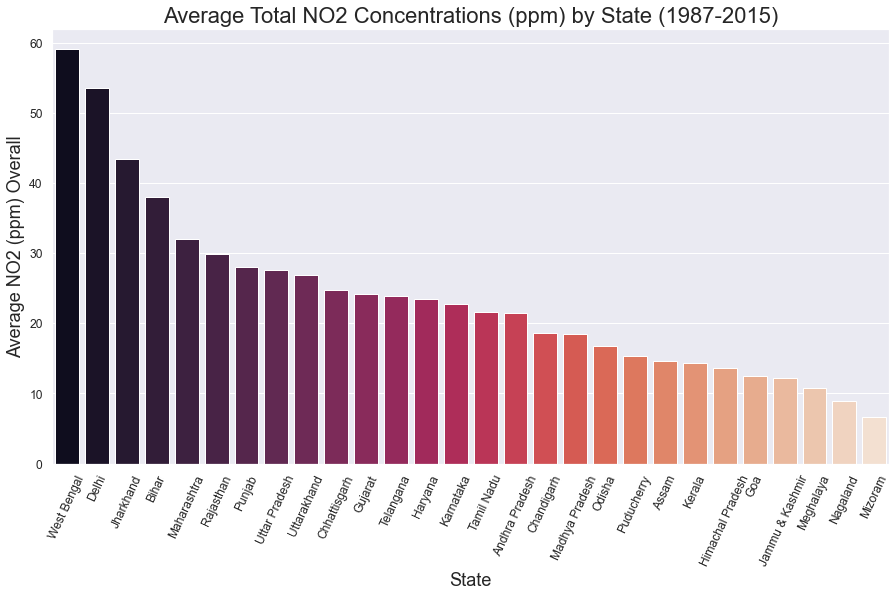

In [173]:
# Visualizing
plt.figure(figsize=(15,8))
sns.barplot(x=no2_state['State'],y=no2_state['Avg NO2'],palette='rocket')
plt.title('Average Total NO2 Concentrations (ppm) by State (1987-2015)', fontsize=22)
plt.xlabel('State', fontsize=18)
plt.ylabel('Average NO2 (ppm) Overall', fontsize=18)
plt.xticks(rotation=65)
sns.set(font_scale=1.3)
plt.show()

###### From the bar plot given above, we can note the five states with the highest NO₂ concentrations as: West Bengal, Delhi, Jharkhand, Bihar, and Maharashtra with values 59.08, 53.49, 43.37, 37.95, and 32.08 μg/m³, respectively.

###### The states Jharkhand, Bihar and Maharashtra made it in the top 5 highest concentrations list for both SO₂ and NO₂.

###### Uttarkhand had the highest average concentration for SO₂, but dropped to the 9th highest position for NO₂ concentrations (still respectively high in its own right, at about 26.94 μg/m³).

###### An interesting fact to note from a recent report in November of 2021, is that people often flee from the state of Delhi (2nd highest on this list) to Uttarkhand hills due to increasing and unbearable air pollution. Esentially, it's a migration from one heavily polluted state to another, leaving very few options for citizens to get access to clean air (Talwar, 2021).

In [177]:
# avg no2 per year in India as a whole from gathered data
no2_yearly = pd.DataFrame(raw_data.groupby('Year')['no2'].mean()).reset_index()
no2_yearly.drop(index=16,inplace=True)
no2_yearly

,Year,no2
0,1987,30.584545
1,1988,30.606439
2,1989,29.215816
3,1990,25.714482
4,1991,25.986805
5,1992,30.702058
6,1993,30.227629
7,1994,31.764829
8,1995,33.078066
9,1996,26.503318


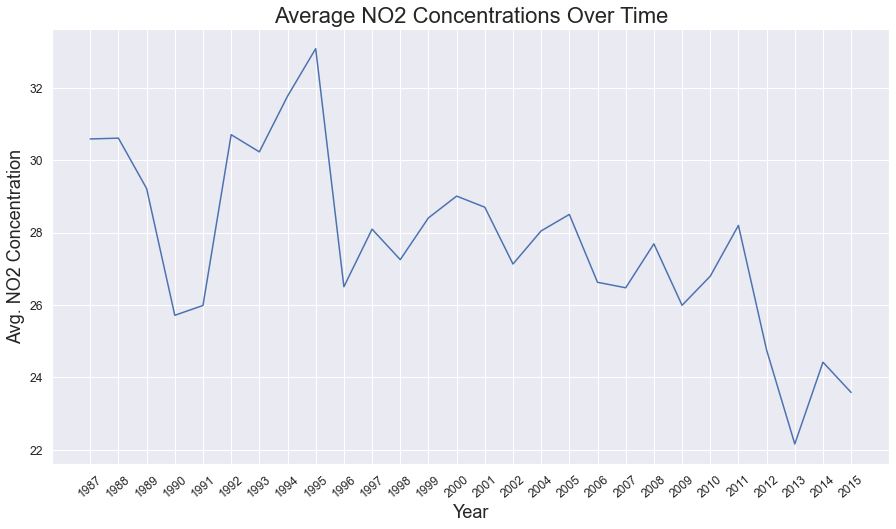

In [214]:
# Visualizing
plt.figure(figsize=(15,8))
sns.lineplot(x=no2_yearly['Year'],y=no2_yearly['no2'])
plt.title('Average NO2 Concentrations Over Time',fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Avg. NO2 Concentration',fontsize=18)
plt.xticks(rotation=40)
plt.show()

###### The average NO₂ concentration since 1987 has fluctuated. There was a stark decrease from 2011 to 2013, but other years indicate slow progress being made in reducing this harmful pollutant in the atmosphere.

###### However, since 1987, averges in India have consistently remained below the threshold of 40 μg/m³.

## Regression Analysis: Comparing SO₂, NO₂, and spm (IVs), with rspm (DV)

###### For this section, I used the method of Ordinary Least Squares (OLS) for the regression model.

###### We will check OLS assumptions such as linearity between the independent variables (SO₂, NO₂ and spm) with the dependent variable (rspm). We'll also confirm multicollinearity through the Variance inflation Factor (VIF). In the process, we'll deal with outliers and make conclusions based on the regression.

###### Next, we'll train and test with sklearn to see how well-fit the model is and analyze the residuals.

In [182]:
# Taking a sample from entire dataset
new_sample = raw_data.sample(10000)
new_sample.dropna(subset=['so2','no2','spm','rspm'],inplace=True)
new_sample_df = new_sample[['so2','no2','spm','rspm']].reset_index()
del new_sample_df['index']
new_sample_df

,so2,no2,spm,rspm
0,12.00,35.500,235.0,139.0
1,7.80,20.000,635.0,297.0
2,36.50,48.300,368.0,174.0
3,2.00,29.000,132.0,67.0
4,8.30,10.500,184.0,106.0
...,...,...,...,...
3263,17.20,23.500,150.0,78.0
3264,6.30,8.400,68.0,36.0
3265,14.00,24.000,190.0,167.0
3266,11.50,12.200,136.0,72.0


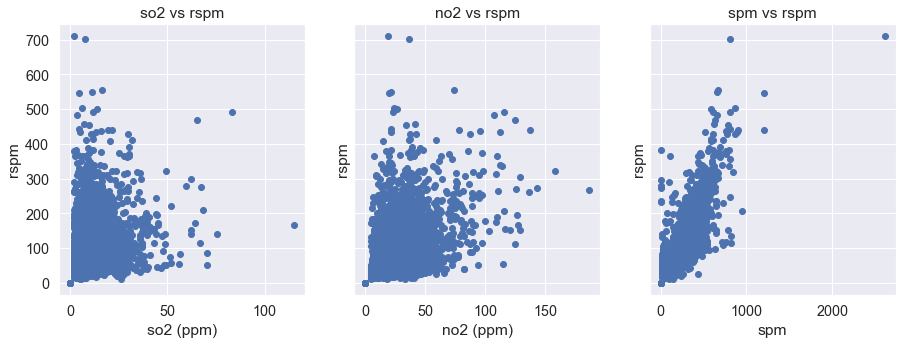

In [191]:
# Creating scatter plots to assess relationships
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(x=new_sample_df['so2'],y=new_sample_df['rspm'])
ax2.scatter(x=new_sample_df['no2'],y=new_sample_df['rspm'])
ax3.scatter(x=new_sample_df['spm'],y=new_sample_df['rspm'])
ax1.set_title("so2 vs rspm")
ax1.set(xlabel='so2 (ppm)', ylabel='rspm')
ax2.set_title("no2 vs rspm")
ax2.set(xlabel='no2 (ppm)', ylabel='rspm')
ax3.set_title("spm vs rspm")
ax3.set(xlabel='spm', ylabel='rspm')

plt.show()

###### There's a simewhat linear relationship between 'spm' and 'rspm,' more so than the left two graphs, which appear more clustered in one area. There are also a few outliers in each case.

In [202]:
# Importing packages
import scipy
import statsmodels.api as sm
import sklearn

<AxesSubplot:xlabel='rspm', ylabel='Density'>

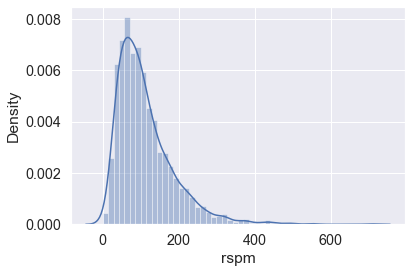

In [195]:
# Optimal distribution will be normal
# We have outliers, skewed right
sns.distplot(new_sample_df['rspm'])

<AxesSubplot:xlabel='rspm', ylabel='Density'>

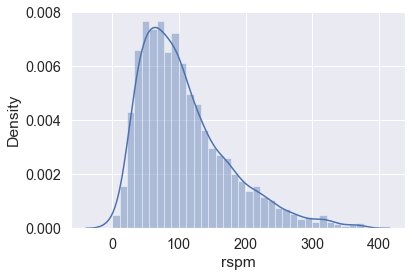

In [196]:
# Let's deal with outliers by removing top 1%, 99th percentile
q = new_sample_df['rspm'].quantile(0.99)
data_1 = new_sample_df[new_sample_df['rspm']<q]
sns.distplot(data_1['rspm'])

In [198]:
# repeat process for independent variables
q = data_1['so2'].quantile(0.99)
data_2 = data_1[data_1['so2']<q]

q = data_2['no2'].quantile(0.99)
data_3 = data_2[data_2['no2']<q]

q = data_3['spm'].quantile(0.99)
data_4 = data_3[data_3['spm']<q]

data_cleaned = data_4.copy()
data_cleaned

,so2,no2,spm,rspm
0,12.00,35.500,235.00,139.0
2,36.50,48.300,368.00,174.0
3,2.00,29.000,132.00,67.0
4,8.30,10.500,184.00,106.0
5,10.00,13.000,30.98,69.0
...,...,...,...,...
3263,17.20,23.500,150.00,78.0
3264,6.30,8.400,68.00,36.0
3265,14.00,24.000,190.00,167.0
3266,11.50,12.200,136.00,72.0


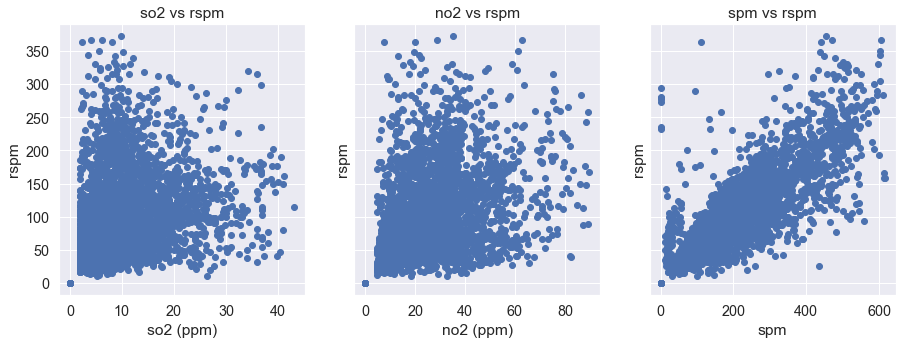

In [200]:
# Now let's check the graphs again
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(x=data_cleaned['so2'],y=data_cleaned['rspm'])
ax2.scatter(x=data_cleaned['no2'],y=data_cleaned['rspm'])
ax3.scatter(x=data_cleaned['spm'],y=data_cleaned['rspm'])
ax1.set_title("so2 vs rspm")
ax1.set(xlabel='so2 (ppm)', ylabel='rspm')
ax2.set_title("no2 vs rspm")
ax2.set(xlabel='no2 (ppm)', ylabel='rspm')
ax3.set_title("spm vs rspm")
ax3.set(xlabel='spm', ylabel='rspm')

plt.show()
# Linear relationship is much clearer for spm vs. rspm, still rather scattered for the other two

###### The graph for 'spm' and 'rspm' now has a linear relationship along a 45-deg. angle after removing outliers. The other two relationships are still scattered and show no clear pattern. Next, we'll check the assumption of 'multicollinearity' using VIF.

In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['so2', 'no2', 'spm']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,2.999709,so2
1,4.327010,no2
2,3.385918,spm


###### For context, multicollinearity refers to significant correlation between multiple predictor variables. If one variable can be used to predict the other, issues such as skewing and redundancy can occur. 

###### To make sure this isn't an issue for our regression, we uses the method of VIF. This method gives us the magnitude of multicollinearity, using OLS. It does this by calculating a ratio between the variance that estimates a parameter with several variables versus the same result using only one variable.

###### There is a lack of consensus on what value constitutes a 'good' VIF. Generally, having a VIF value equal to 1 indicates 'no multicollinearity,' a value between 1 and 5 is fine, and a value greater than that (typically greater than 10) is unusable.

###### From the VIF's we calculated, they all land in the range between 1 and 5, which is fine.

In [201]:
# Regression
y = data_cleaned['rspm']
x1 = data_cleaned[['so2','no2','spm']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rspm   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1997.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:05:22   Log-Likelihood:                -15789.
No. Observations:                3137   AIC:                         3.159e+04
Df Residuals:                    3133   BIC:                         3.161e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5970      1.653      7.620      0.000       9.356      15.838
so2            0.7618      0.095      8.057      0.000       0.576       0.947
no2            0.0802      0.049      1.638      0.102      -0.016       0.176
spm            0.3847      0.005     70.726      0.000       0.374       0.395
==============================================================================
Omnibus:                     1070.116   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9074.472
Skew:                           1.377   Prob(JB):                         0.00
Kurtosis:                      10.864   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### From the information we have, we can see that the independent variables, 'so2' and 'spm' are  significant due to p-values of < 0.000... whereas the IV 'no2' is not significant, with a p-value of 0.102. With this information, we can conclude that 'no2' is not really useful in our model to predict which factors have the greatest effect on rspm. 

###### We can also see that the R² value, along with the adjusted R², are close. R² is 0.657 and the adjusted R² is 0.656. In context, this means that our model offers explanation for roughly 65-66% of the variation in our data. Essentially, it's the variance proportion for the DV ('rspm') explained by the IV's (spm, no2, so2). With an R² value nearing 66%, we have a 'moderate' model. 

###### From the 'Prob (F-Statistic)' value of 0.00... we can note that the overall model is significant.

In [208]:
# Let's assess the relationship between spm and rspm, which we saw has the clearest linear graph.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
targets = data_cleaned['rspm']
inputs = data_cleaned['spm']
x_mat = inputs.values.reshape(-1,1)
scaler = StandardScaler()
scaler.fit(x_mat)
x_train, x_test, y_train, y_test = train_test_split(x_mat, targets, test_size=0.2, random_state = 365)
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)

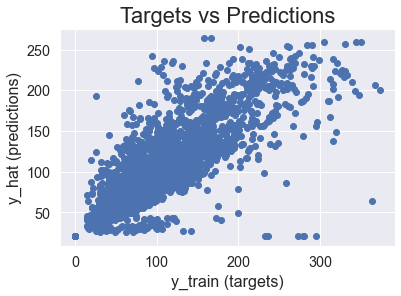

In [209]:
plt.scatter(y_train,y_hat)
plt.xlabel("y_train (targets)", fontsize=16)
plt.ylabel("y_hat (predictions)", fontsize=16)
plt.title("Targets vs Predictions", fontsize=22)
plt.show()

###### From the graph between 'targets' and 'predictions' above, we can see there's a somewhat linear trend. In an ideal model, we'd want the 'x' and 'y' values to match for each point, indicating an accurate prediction. For context, if the target was a value of 7, the predicted value should also be 7.

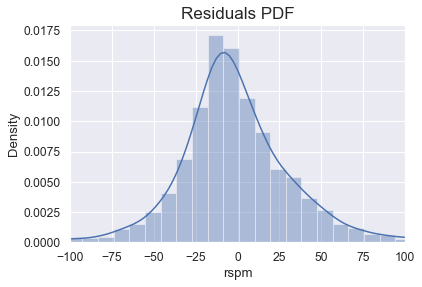

In [218]:
# Checking residuals plot
# Residual = difference between the targets and the predictions
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=17)
plt.xlim(-100,100)
plt.show()

###### Residuals represent the vertical distance from the regression line. Ideally, we'd want the pdf of the residuals to be normally distributed.

### Regression Conclusions

###### We created a 'fair' regression model using the independent variables of sulfur dioxide, nitrogen dioxide and suspended particulate matter to predict respiratory suspended particulate matter in which said IV's explained nearly 66% of variability in the DV. 

###### When creating this model, there was an expectation that SO₂ and NO₂ would be more significant in explaining the variability of rspm and for there to be more of a stronger relationship between the two. I figured that as concentrations of SO₂ and NO₂ increased in the atmosphere, we'd see higher recorded values for rspm. Perhaps analyzing other datasets from other countries will yield different results.

###### Although a somewhat redundant statement, there's good evidence from our model to support that suspended particulate matter can be used to predict the value for respiratory suspended particulate matter. More precisely, as levels of spm rise, so does concentrations of rspm.

## India's Policies: What's next?

One of those most recent declarations by India’s government that would have substantial positive impacts on air pollution in the country occurred in 2019 with the National Clean Air Programme (NCAP). The objective for this program is to focus on the reduction of particulate matter (PM₂.₅) and air pollution by at least 20% by 2024, in comparison to levels seen in 2017. Upon successful completion, it is expected that life expectancy would increase across India by 1.8 years and even more so (3.5 years) for citizens in the state of Delhi (India - AQLI, 2022).

Previous initiatives such as the Graded Response Action Plan (GRAP) were also initiated to tackle the issue of pollution. Specifically, this action plan aimed to tackle the ever-increasing pollution in the state of Delhi and NCR. Rather than emphasizing constructive measures towards reducing emissions and concentrations of pollutants, it served as an ‘emergency plan.’ When air quality would worsen, actions such as shutting down schools and construction ensue. Assisted by the Environment Pollution (Prevention and Control) Authority (EPCA), a thermal power plant was shut down in Badarpur, as well as banning a particular substance known as ‘Pet coke,’ which was utilized as fuel and exacerbated the effects of pollution ("Explained: What is GRAP...," 2022).

# Conclusion

There is still a lot of work to be done in reducing emmissions of harmful substances that poison India's atmosphere. Nitrogen Dioxide and Sulfur Dioxide are only two of several harmful pollutants that require attention and action through the form of large scale policies in order to protect the health of India's population. Progress has been made, but not nearly at the rate required to meet goals. 

India continues to be one of the world's greatest polluters. A lot more work, studies, and data analyses is required to understand current trajectories and projections, in order to then create viable paths and policies for a 'cleaner,' less polluted, environment in India.

# References

India - Air Quality Life Index (2022). https://aqli.epic.uchicago.edu/country-spotlight/india/

Explained: What is…, (2020, October 11). The Indian Express. https://indianexpress.com/article/explained/explained-what-is-grap-delhi-ncrs-action-plan-as-air-pollution-increases-6719746/

Air pollution, (2020). European Environmental Agency. https://www.eea.europa.eu/themes/air/contentbytype?b_start:int=600&contenttype=EEAFigure

Sebastian, S. (2011, July 24). MIT study says… India Today. https://www.indiatoday.in/india/north/story/mit-study-high-rspm-in-delhi-air-pollution-138144-2011-07-24

Anab, M. (2021, September 2). U'khand among top 3… The Times of India. https://timesofindia.indiatimes.com/city/dehradun/ukhand-among-top-3-most-polluted-himalayan-states-tripura-first-report/articleshow/85843106.cms

Talwar, G. (2021, November 8). To escape Delhi pollution… The Times of India. https://timesofindia.indiatimes.com/city/delhi/with-delhi-in-midst-of-its-pollution-season-many-make-beeline-for-hills/articleshow/87573679.cms
